In [86]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
#from keras.utils.image_utils import load_img, img_to_array
from keras.utils import load_img, img_to_array

import h5py
from tensorflow import keras
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [87]:
train_files_path = "/Users/halilbugday/Desktop/OrnitholensModelTraining/data/train/"
test_files_path = "/Users/halilbugday/Desktop/OrnitholensModelTraining/data/test/"
img=load_img(test_files_path + "106.Horned_Puffin/Horned_Puffin_0001_100973.jpg") # path checking

In [88]:
print(img_to_array(img).shape)

(375, 500, 3)


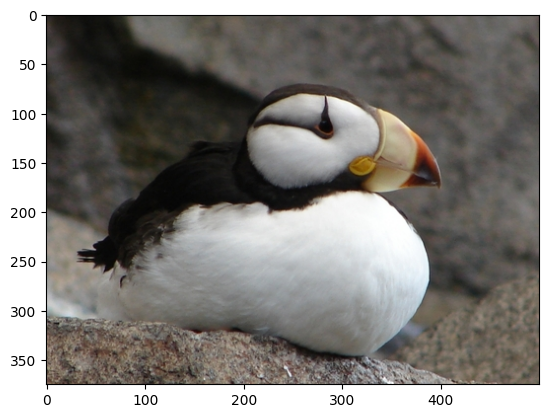

In [89]:
plt.imshow(img)
plt.show()

In [90]:
#building our train and test dataset from direc. 224,224 comes vgg16
train_data = ImageDataGenerator().flow_from_directory(train_files_path, target_size=(224,224))
test_data = ImageDataGenerator().flow_from_directory(test_files_path, target_size=(224,224))

Found 11588 images belonging to 200 classes.
Found 199 images belonging to 200 classes.


In [91]:
number_of_bird_types = 200 #if you want to add more spicies ++

In [92]:
vgg=VGG16(weights="vgg16_weights.h5") #buildin our model obj.

In [93]:
vgg_layers = vgg.layers #look the layers and check
print(vgg_layers)

[<keras.engine.input_layer.InputLayer object at 0x15e6d5ed0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x15eeb0510>, <keras.layers.convolutional.conv2d.Conv2D object at 0x10ffc3f10>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x15eeb0090>, <keras.layers.convolutional.conv2d.Conv2D object at 0x15d852050>, <keras.layers.convolutional.conv2d.Conv2D object at 0x15f689fd0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x15f769310>, <keras.layers.convolutional.conv2d.Conv2D object at 0x15f520590>, <keras.layers.convolutional.conv2d.Conv2D object at 0x15e53b1d0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x15e559b90>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x15c90b390>, <keras.layers.convolutional.conv2d.Conv2D object at 0x15e658150>, <keras.layers.convolutional.conv2d.Conv2D object at 0x15fb4db50>, <keras.layers.convolutional.conv2d.Conv2D object at 0x15e613fd0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 

In [94]:
vggmodel_layersize_tobe_used = len(vgg_layers) -1 #delete the output layer no need
model = Sequential() #creating our model#since we do not need to re-train all vgg16 (if you want goodluck with 138 millions image :)
for i in range (vggmodel_layersize_tobe_used): #fill layers
    model.add(vgg_layers[i])

In [95]:
for layers in model.layers: #since we do not need to re-train all vgg16 (if you want goodluck with 138 millions image :)
    layers.trainable=False

model.add(Dense(number_of_bird_types, activation="softmax")) #our output layer
print(model.summary()) #check

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      


                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       295168    
                                                                 
 block3_conv2 (Conv2D)       (None, 56, 56, 256)       590080    
                                                                 
 block3_co

In [96]:
model.compile(loss = "categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [97]:
batch_size =32
model.fit(train_data,
                    steps_per_epoch=11500//batch_size,
                    epochs=8, #overfitting Level?
                    validation_data=test_data,
                    validation_steps=195//batch_size)

Epoch 1/8
359/359 [==============================] - 3879s 11s/step - loss: 4.6703 - accuracy: 0.2422 - val_loss: 4.0001 - val_accuracy: 0.3281
Epoch 2/8
359/359 [==============================] - 3903s 11s/step - loss: 2.4014 - accuracy: 0.5239 - val_loss: 4.5796 - val_accuracy: 0.3958
Epoch 3/8
359/359 [==============================] - 3896s 11s/step - loss: 1.5437 - accuracy: 0.6623 - val_loss: 5.1059 - val_accuracy: 0.3490
Epoch 4/8
359/359 [==============================] - 3857s 11s/step - loss: 0.9984 - accuracy: 0.7518 - val_loss: 4.6499 - val_accuracy: 0.3802
Epoch 5/8
359/359 [==============================] - 24943s 70s/step - loss: 0.6274 - accuracy: 0.8303 - val_loss: 4.8072 - val_accuracy: 0.4010
Epoch 6/8
359/359 [==============================] - 4721s 13s/step - loss: 0.4195 - accuracy: 0.8827 - val_loss: 5.0102 - val_accuracy: 0.4115
Epoch 7/8
359/359 [==============================] - 4048s 11s/step - loss: 0.2469 - accuracy: 0.9275 - val_loss: 5.2583 - val_accuracy

In [98]:
model.save("birdClassVGG.h5")

In [119]:
img = Image.open("testGad.jpeg").resize((224,224))

In [120]:
img = np.array(img)

In [121]:
img.shape

(224, 224, 3)

In [122]:
img = img.reshape(-1,224,224,3)

In [123]:
print(img.shape)
print(img.ndim)

(1, 224, 224, 3)
4


In [124]:
img = preprocess_input(img)

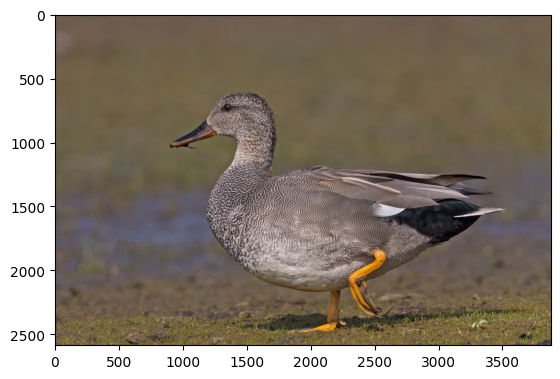

In [126]:
img_for_disp = load_img("testGad.jpeg")
plt.imshow(img_for_disp)
plt.show()

In [127]:
preds = model.predict(img)

1/1 [==============================] - 0s 394ms/step


In [128]:
preds

array([[2.59246872e-06, 4.36740990e-08, 1.75602072e-05, 1.65271778e-17,
        1.17694682e-11, 4.54511678e-07, 4.60657884e-06, 8.44651709e-08,
        5.69440166e-13, 1.10084155e-11, 4.29003838e-13, 6.02186578e-10,
        1.69802150e-09, 1.66444414e-14, 1.78603619e-13, 1.02667792e-16,
        7.43459545e-17, 7.92234388e-14, 2.58820631e-16, 1.22101208e-15,
        8.42640076e-16, 1.36197106e-15, 5.83531346e-06, 9.17040597e-05,
        8.61868965e-10, 1.66451830e-09, 8.44970581e-16, 2.17515486e-14,
        1.13380826e-10, 5.96216188e-10, 5.73038188e-12, 2.24583834e-13,
        3.33429411e-16, 2.14363388e-11, 5.56547010e-18, 4.47991141e-07,
        2.30676044e-18, 1.21370783e-14, 5.74772801e-17, 2.39073482e-15,
        4.38625900e-16, 3.28454389e-15, 3.68172744e-16, 1.20185760e-07,
        1.73812986e-09, 8.83972406e-01, 1.44280413e-22, 1.43005185e-09,
        9.73142533e-14, 1.67700467e-08, 6.92920537e-07, 8.32267446e-08,
        4.59247647e-04, 1.96012381e-15, 5.17639855e-11, 1.702395

In [130]:
image_classes = ["Black_footed_Albatross",
"Laysan_Albatross",
"Sooty_Albatross",
"Groove_billed_Ani",
"Crested_Auklet",
"Least_Auklet",
"Parakeet_Auklet",
"Rhinoceros_Auklet",
"Brewer_Blackbird",
"Red_winged_Blackbird",
"Rusty_Blackbird",
"Yellow_headed_Blackbird",
"Bobolink",
"Indigo_Bunting",
"Lazuli_Bunting",
"Painted_Bunting",
"Cardinal",
"Spotted_Catbird",
"Gray_Catbird",
"Yellow_breasted_Chat",
"Eastern_Towhee",
"Chuck_will_Widow",
"Brandt_Cormorant",
"Red_faced_Cormorant",
"Pelagic_Cormorant",
"Bronzed_Cowbird",
"Shiny_Cowbird",
"Brown_Creeper",
"American_Crow",
"Fish_Crow",
"Black_billed_Cuckoo",
"Mangrove_Cuckoo",
"Yellow_billed_Cuckoo",
"Gray_crowned_Rosy_Finch",
"Purple_Finch",
"Northern_Flicker",
"Acadian_Flycatcher",
"Great_Crested_Flycatcher",
"Least_Flycatcher",
"Olive_sided_Flycatcher",
"Scissor_tailed_Flycatcher",
"Vermilion_Flycatcher",
"Yellow_bellied_Flycatcher",
"Frigatebird",
"Northern_Fulmar",
"Gadwall",
"American_Goldfinch",
"European_Goldfinch",
"Boat_tailed_Grackle",
"Eared_Grebe",
"Horned_Grebe",
"Pied_billed_Grebe",
"Western_Grebe",
"Blue_Grosbeak",
"Evening_Grosbeak",
"Pine_Grosbeak",
"Rose_breasted_Grosbeak",
"Pigeon_Guillemot",
"California_Gull",
"Glaucous_winged_Gull",
"Heermann_Gull",
"Herring_Gull",
"Ivory_Gull",
"Ring_billed_Gull",
"Slaty_backed_Gull",
"Western_Gull",
"Anna_Hummingbird",
"Ruby_throated_Hummingbird",
"Rufous_Hummingbird",
"Green_Violetear",
"Long_tailed_Jaeger",
"Pomarine_Jaeger",
"Blue_Jay",
"Florida_Jay",
"Green_Jay",
"Dark_eyed_Junco",
"Tropical_Kingbird",
"Gray_Kingbird",
"Belted_Kingfisher",
"Green_Kingfisher",
"Pied_Kingfisher",
"Ringed_Kingfisher",
"White_breasted_Kingfisher",
"Red_legged_Kittiwake",
"Horned_Lark",
"Pacific_Loon",
"Mallard",
"Western_Meadowlark",
"Hooded_Merganser",
"Red_breasted_Merganser",
"Mockingbird",
"Nighthawk",
"Clark_Nutcracker",
"White_breasted_Nuthatch",
"Baltimore_Oriole",
"Hooded_Oriole",
"Orchard_Oriole",
"Scott_Oriole",
"Ovenbird",
"Brown_Pelican",
"White_Pelican",
"Western_Wood_Pewee",
"Sayornis",
"American_Pipit",
"Whip_poor_Will",
"Horned_Puffin",
"Common_Raven",
"White_necked_Raven",
"American_Redstart",
"Geococcyx",
"Loggerhead_Shrike",
"Great_Grey_Shrike",
"Baird_Sparrow",
"Black_throated_Sparrow",
"Brewer_Sparrow",
"Chipping_Sparrow",
"Clay_colored_Sparrow",
"House_Sparrow",
"Field_Sparrow",
"Fox_Sparrow",
"Grasshopper_Sparrow",
"Harris_Sparrow",
"Henslow_Sparrow",
"Le_Conte_Sparrow",
"Lincoln_Sparrow",
"Nelson_Sharp_tailed_Sparrow",
"Savannah_Sparrow",
"Seaside_Sparrow",
"Song_Sparrow",
"Tree_Sparrow",
"Vesper_Sparrow",
"White_crowned_Sparrow",
"White_throated_Sparrow",
"Cape_Glossy_Starling",
"Bank_Swallow",
"Barn_Swallow",
"Cliff_Swallow",
"Tree_Swallow",
"Scarlet_Tanager",
"Summer_Tanager",
"Artic_Tern",
"Black_Tern",
"Caspian_Tern",
"Common_Tern",
"Elegant_Tern",
"Forsters_Tern",
"Least_Tern",
"Green_tailed_Towhee",
"Brown_Thrasher",
"Sage_Thrasher",
"Black_capped_Vireo",
"Blue_headed_Vireo",
"Philadelphia_Vireo",
"Red_eyed_Vireo",
"Warbling_Vireo",
"White_eyed_Vireo",
"Yellow_throated_Vireo",
"Bay_breasted_Warbler",
"Black_and_white_Warbler",
"Black_throated_Blue_Warbler",
"Blue_winged_Warbler",
"Canada_Warbler",
"Cape_May_Warbler",
"Cerulean_Warbler",
"Chestnut_sided_Warbler",
"Golden_winged_Warbler",
"Hooded_Warbler",
"Kentucky_Warbler",
"Magnolia_Warbler",
"Mourning_Warbler",
"Myrtle_Warbler",
"Nashville_Warbler",
"Orange_crowned_Warbler",
"Palm_Warbler",
"Pine_Warbler",
"Prairie_Warbler",
"Prothonotary_Warbler",
"Swainson_Warbler",
"Tennessee_Warbler",
"Wilson_Warbler",
"Worm_eating_Warbler",
"Yellow_Warbler",
"Northern_Waterthrush",
"Louisiana_Waterthrush",
"Bohemian_Waxwing",
"Cedar_Waxwing",
"American_Three_toed_Woodpecker",
"Pileated_Woodpecker",
"Red_bellied_Woodpecker",
"Red_cockaded_Woodpecker",
"Red_headed_Woodpecker",
"Downy_Woodpecker",
"Bewick_Wren",
"Cactus_Wren",
"Carolina_Wren",
"House_Wren",
"Marsh_Wren",
"Rock_Wren",
"Winter_Wren",
"Common_Yellowthroat",
]
result = np.argmax(preds[0])
print(image_classes[result])

Gadwall
